In [1]:
import pandas as pd
import numpy as np
import scipy.stats as s
import datetime
import json

/Applications/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
curated_data = pd.read_csv('../data/curated_data.csv')

<Axes: xlabel='date'>

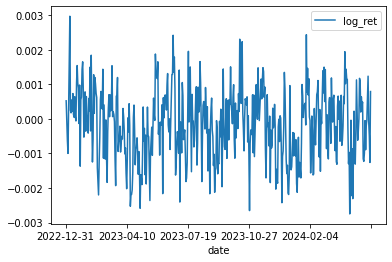

In [3]:
daily_data = curated_data.groupby('date').mean()
daily_data[['log_ret']].plot()

<Axes: xlabel='date'>

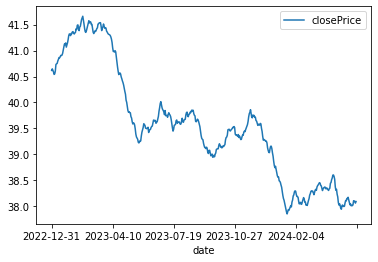

In [4]:
daily_data[['closePrice']].plot()

<Axes: xlabel='date'>

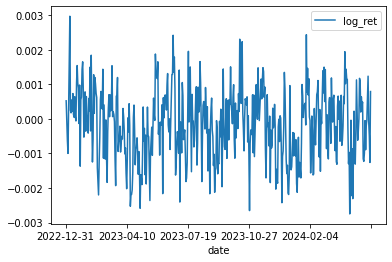

In [5]:
daily_data[['log_ret']].plot()

In [6]:
stocks_std_above_1 = list()
stocks_std_above_1_5 = list()
stocks_std_below_1 = list()
stocks_std_below_1_5 = list()

for stock in range(50):
    stock_ret = curated_data[curated_data['stock'] == stock]['closePrice']

    print(stock, ':', np.mean(stock_ret), np.std(stock_ret), s.skew(stock_ret))

    if np.std(stock_ret) > 1:
        stocks_std_above_1.append(stock)

        if np.std(stock_ret) > 1.5:
            stocks_std_above_1_5.append(stock)

    if np.std(stock_ret) < 1.5:
        stocks_std_below_1_5.append(stock)
    
        if np.std(stock_ret) < 1:
            stocks_std_below_1.append(stock)

0 : 64.15103999999995 3.1201307213640908 0.27476071180609474
1 : 9.830280000000009 0.7151925066721546 -0.1441534954787625
2 : 43.57540000000001 2.6624764487221286 -0.30637754437719195
3 : 32.25566 0.7453539859690824 0.5026175770470863
4 : 55.25967999999999 4.278391274486241 -0.9315392554664905
5 : 49.47923999999999 5.602742669657425 0.33329074790598745
6 : 51.39505999999996 3.7962361091481154 0.14607355809960793
7 : 41.186719999999966 3.6137820135697156 0.5535606337331549
8 : 32.78681999999996 0.6436471763318785 0.5843779401691874
9 : 36.458240000000025 2.106442617874979 0.5261661092311737
10 : 38.448739999999994 0.7317470959286413 0.12567715039678998
11 : 34.37839999999999 1.6859921233505213 0.12026685150531392
12 : 24.974619999999987 0.7562613672534118 -0.008461359747518228
13 : 14.61418 0.5100046348808996 -0.43183097410267274
14 : 29.87944000000001 0.7945754126576032 0.06382350423729548
15 : 52.25873999999996 3.375857196683533 0.07560283673809548
16 : 53.44609999999998 2.90308370358

In [7]:
len(stocks_std_above_1)

36

In [8]:
len(stocks_std_above_1_5)

30

In [9]:
len(stocks_std_below_1)

14

In [10]:
len(stocks_std_below_1_5)

20

In [11]:
with open(f'../data/stock_std_above_1.json', 'w') as f:
    json.dump(stocks_std_above_1, f)

with open(f'../data/stock_std_above_1_5.json', 'w') as f:
    json.dump(stocks_std_above_1_5, f)

with open(f'../data/stock_std_below_1_5.json', 'w') as f:
    json.dump(stocks_std_above_1_5, f)

with open(f'../data/stock_std_below_1.json', 'w') as f:
    json.dump(stocks_std_below_1, f)


In [12]:
for stock in range(50):
    stock_ret = curated_data[curated_data['stock'] == stock]['log_ret']

    print(stock, ':', np.mean(stock_ret.iloc[1:]), np.std(stock_ret.iloc[1:]), s.skew(stock_ret.iloc[1:]))

0 : 0.00027992475807306415 0.004679101927477583 0.04246129502176915
1 : -0.00042451479442429726 0.005680888882649304 0.11817923065938761
2 : -0.00019492698349331378 0.008242149449365473 -0.24044491462159334
3 : -0.00012661102529363955 0.0008265526610076091 -0.07922652880245484
4 : -0.0004974678623485833 0.007576647555372879 -0.09168706298789067
5 : 0.0006094725576638294 0.009848752963380092 0.09279103455712462
6 : -0.000358044461689329 0.01000453968931278 0.01689473058538901
7 : -0.00011318073559212009 0.009422217615148677 -0.14242750680897023
8 : 5.695501610184349e-05 0.004619890786107449 -0.09664352630696003
9 : -0.00030160391112285035 0.0031299262422034464 -0.010843461399974857
10 : -7.849598812734968e-05 0.0008509805937277346 -0.02051003048913811
11 : -0.00015458061900246165 0.005498778684433942 -0.19947580501166884
12 : -0.00019238438593487326 0.00025723425102404184 -0.048425030670803386
13 : -0.000285687151243473 0.001982589866445845 0.06824265983842548
14 : -0.000170972389127126

In [13]:
# corr

for stock in range(50):
    stock_ret = curated_data[curated_data['stock'] == stock]['log_ret']

    print(stock, ':', np.corrcoef(stock_ret.iloc[1:], daily_data['log_ret'].iloc[1:])[0, 1])

0 : 0.23802507869767967
1 : 0.23677148156679712
2 : 0.1590647601253255
3 : 0.3553888454667236
4 : 0.14802177523690743
5 : 0.2840566747674708
6 : 0.22343422015468564
7 : 0.1757512262359745
8 : 0.10684459970194504
9 : 0.1761589596200357
10 : 0.40628391532310143
11 : 0.09178698846592367
12 : 0.5058116287376022
13 : -0.04574372427022328
14 : 0.442994261658129
15 : 0.23864198333156042
16 : 0.20393819963299348
17 : 0.16951248438543834
18 : 0.11093325179583738
19 : 0.37099219900797004
20 : 0.16940754828792837
21 : 0.1170508081427779
22 : 0.2492251893494201
23 : 0.19104057168058433
24 : 0.1594426857531987
25 : 0.1342826971828882
26 : 0.13186886266573297
27 : 0.10288050416051611
28 : 0.1911061931757992
29 : 0.2502528381462563
30 : 0.23665509209269975
31 : 0.183896940458676
32 : 0.2006907209847817
33 : 0.04046505330947792
34 : 0.12588189974662653
35 : 0.15187909204471542
36 : 0.10358511494149611
37 : 0.33103030618940976
38 : 0.17977440668579497
39 : 0.271991610313102
40 : 0.16578291497527045
41 

Observations: Nonstationary


Stock 0
Stock 1
Stock 2
Stock 3
Stock 4
Stock 5
Stock 6
Stock 7
Stock 8
Stock 9
Stock 10
Stock 11
Stock 12
Stock 13
Stock 14
Stock 15
Stock 16
Stock 17
Stock 18
Stock 19
Stock 20
Stock

/Applications/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


 21
Stock 22
Stock 23
Stock 24
Stock 25
Stock 26
Stock 27
Stock 28
Stock 29
Stock 30
Stock 31
Stock 32
Stock 33
Stock 34
Stock 35
Stock 36
Stock 37
Stock 38
Stock 39
Stock 40
Stock 41
Stock 42
Stock 43
Stock 44
Stock 45
Stock 46
Stock 47
Stock 48
Stock 49


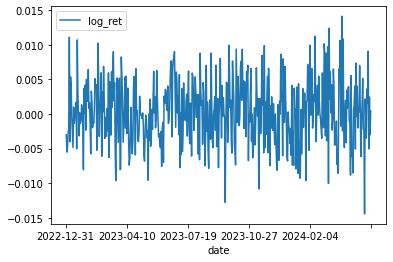

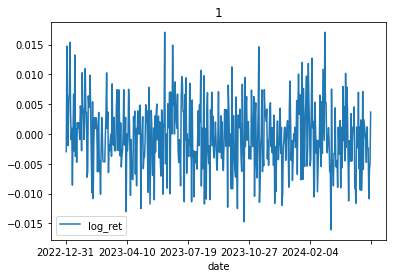

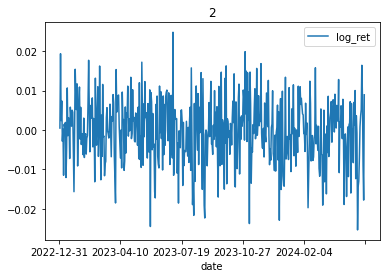

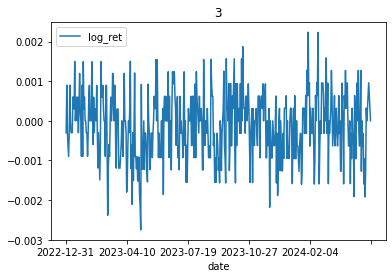

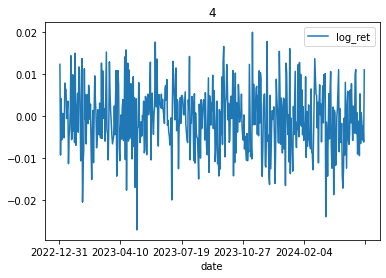

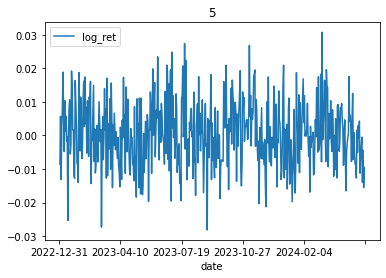

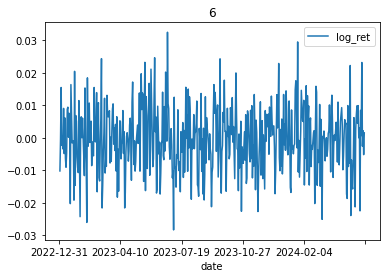

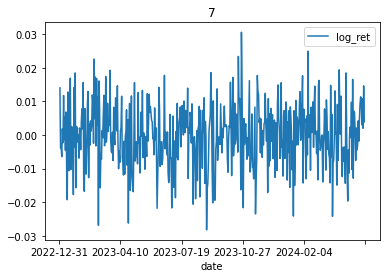

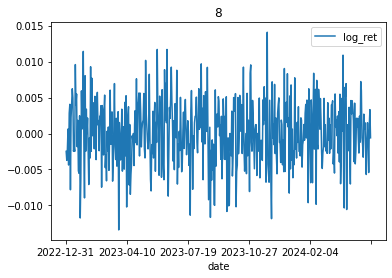

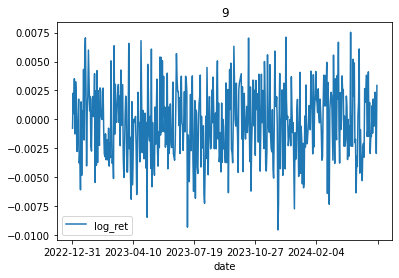

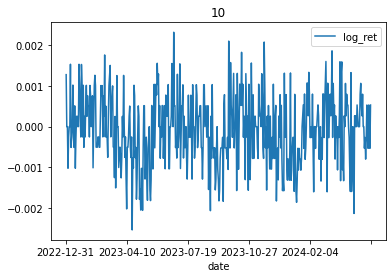

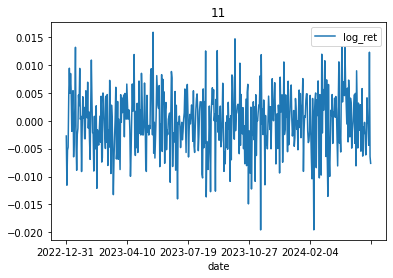

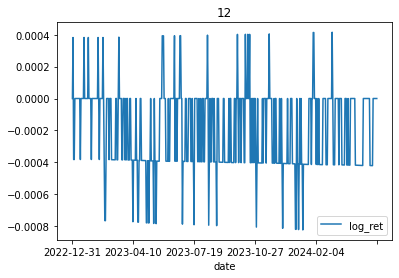

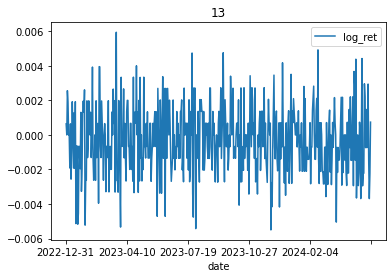

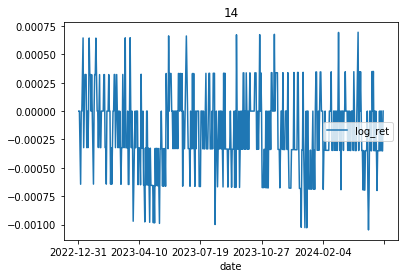

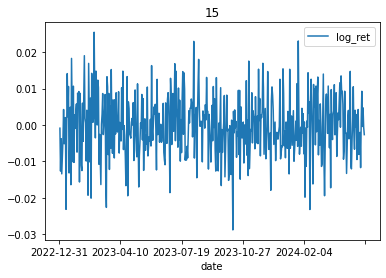

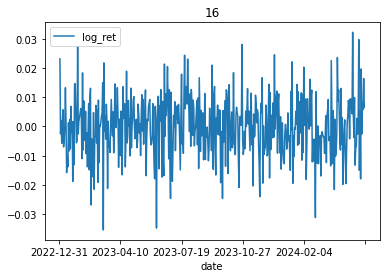

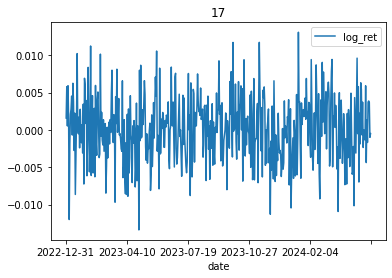

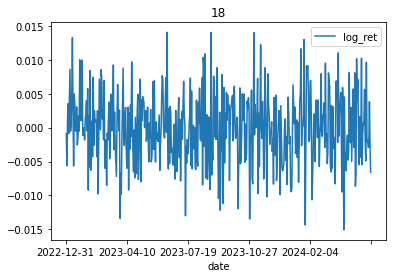

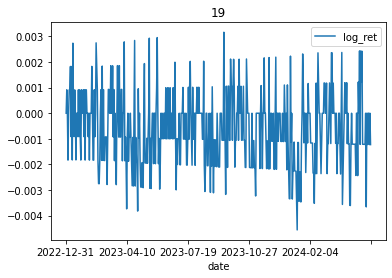

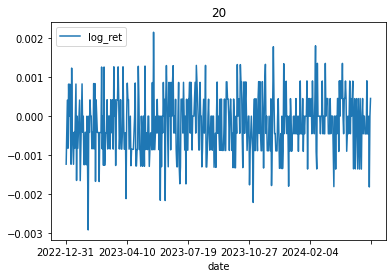

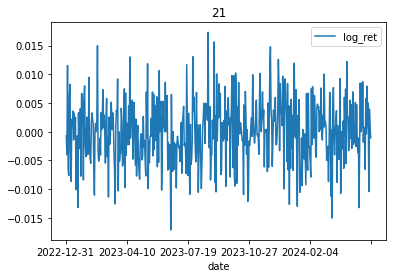

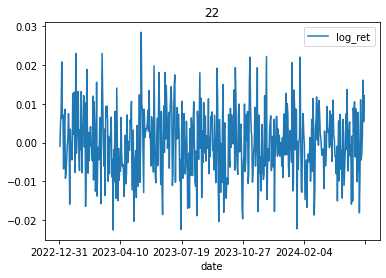

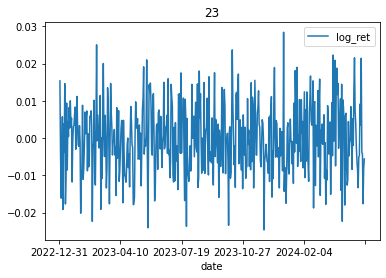

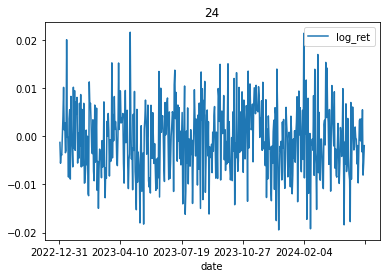

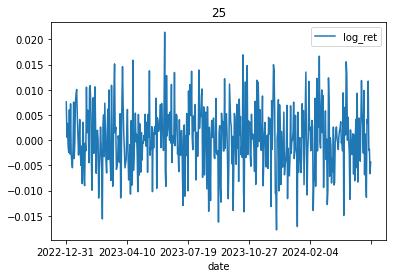

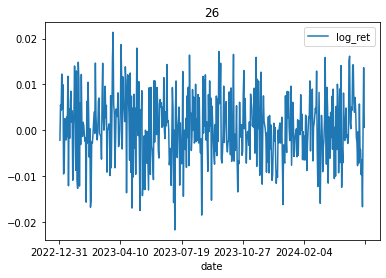

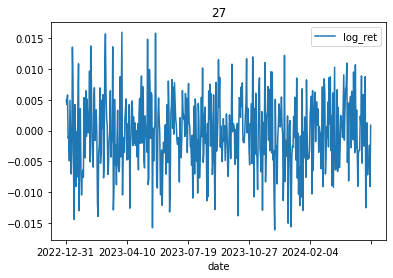

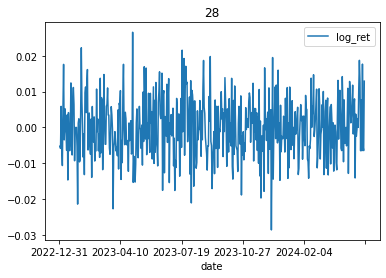

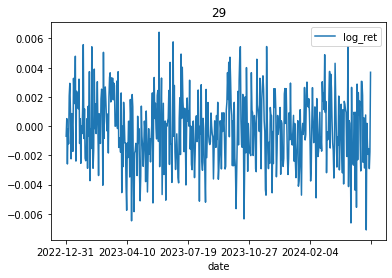

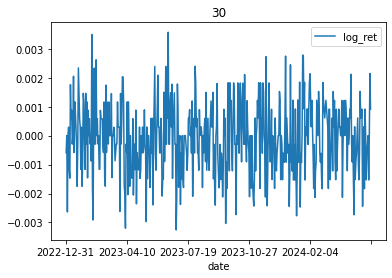

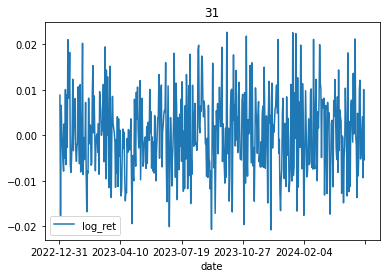

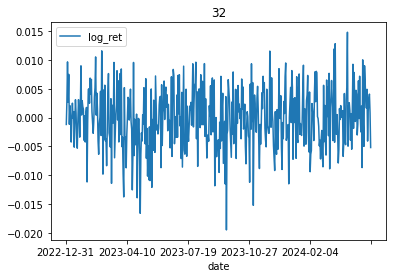

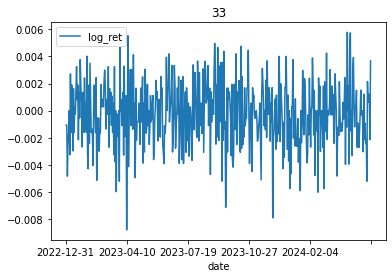

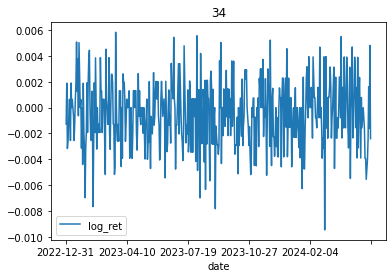

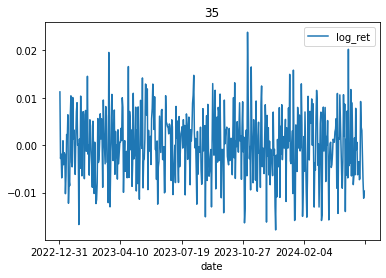

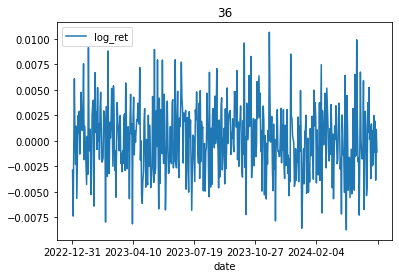

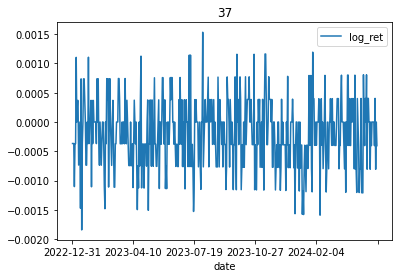

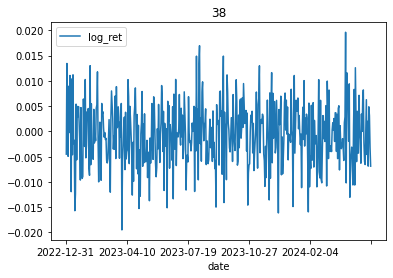

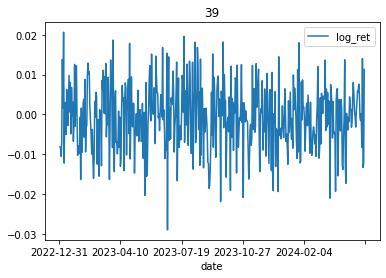

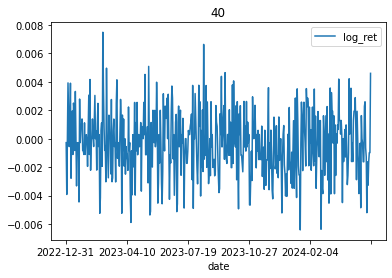

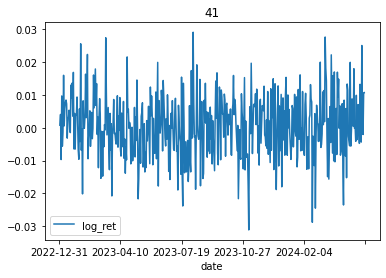

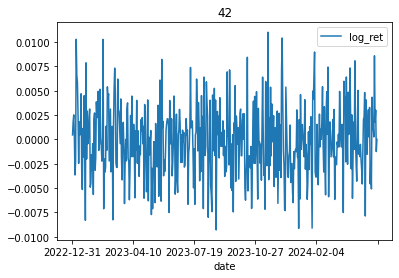

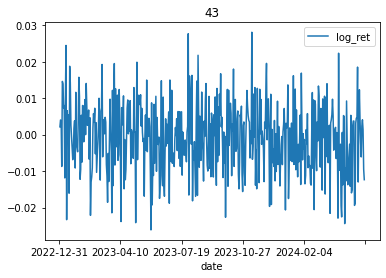

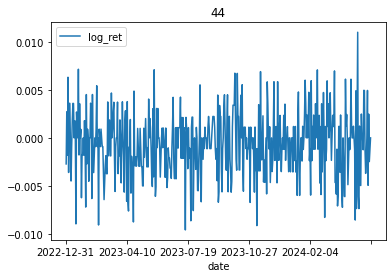

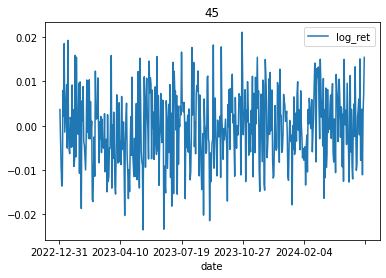

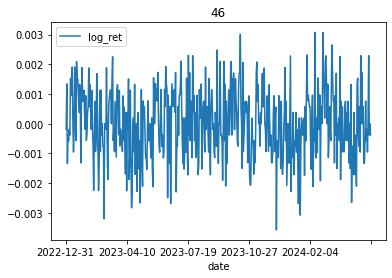

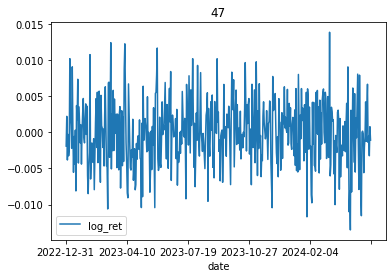

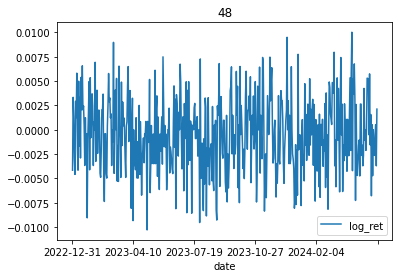

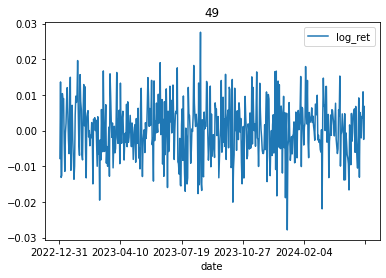

In [14]:
for stock, stock_data in curated_data.groupby('stock'):
    print('Stock', stock)
    stock_data.plot(x='date', y='log_ret', title=stock)

Trend follow

In [13]:
for stock in curated_data['stock'].unique():
    stock_data = curated_data[curated_data['stock'] == stock]

    up_up = 0
    up_down = 0

    down_up = 0
    down_down = 0

    stock_data = np.array(stock_data['trend'].loc[1:])
    for i in range(len(stock_data)-1):
        if stock_data[i] == 1:
            if stock_data[i+1] == 1:
                up_up += 1
            else:
                up_down += 1
        else:
            if stock_data[i+1] == 1:
                down_up += 1
            else:
                down_down += 1
    
    print('stock', up_up, up_down, down_up, down_down)

stock 142 125 126 105
stock 121 124 125 129
stock 125 126 127 121
stock 170 94 95 140
stock 114 131 132 122
stock 136 119 119 125
stock 124 119 120 136
stock 130 123 124 122
stock 126 132 132 109
stock 114 122 123 140
stock 153 102 103 141
stock 145 120 120 114
stock 188 70 71 170
stock 114 130 131 124
stock 138 103 104 154
stock 104 135 135 125
stock 133 127 128 111
stock 136 126 126 111
stock 119 127 127 126
stock 134 108 108 149
stock 126 128 129 116
stock 136 122 122 119
stock 123 123 124 129
stock 120 122 122 135
stock 113 117 117 152
stock 147 122 122 108
stock 139 120 121 119
stock 108 126 127 138
stock 116 134 135 114
stock 125 118 119 137
stock 148 112 113 126
stock 140 118 118 123
stock 120 124 124 131
stock 100 139 140 120
stock 124 120 120 135
stock 128 125 125 121
stock 136 124 124 115
stock 141 112 112 134
stock 112 122 122 143
stock 120 117 118 144
stock 106 127 128 138
stock 132 127 128 112
stock 118 123 124 134
stock 121 128 128 122
stock 132 118 119 130
stock 118 128 